In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv('data.csv')

In [7]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


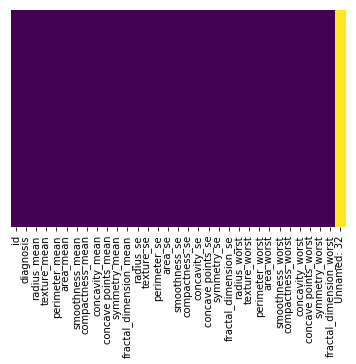

In [9]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Checking for null values

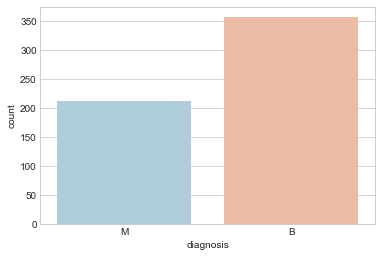

In [11]:
# Exploring the data, 
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=dataset,palette='RdBu_r')
# From the graph, there are more Beningn cancer cases than Malign

In [13]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
df = dataset.drop(['radius_worst','texture_worst','perimeter_se',
                   'radius_se','fractal_dimension_mean','symmetry_mean','concavity_mean',
                   'compactness_mean','area_mean','perimeter_mean','texture_mean','texture_mean', 
                   'Unnamed: 32'], axis=1) # Dropping unnecessary columns

In [17]:
df.head()

,id,diagnosis,radius_mean,smoothness_mean,concave points_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,...,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,0.11840,0.14710,0.9053,153.40,0.006399,0.04904,0.05373,...,0.03003,0.006193,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,0.08474,0.07017,0.7339,74.08,0.005225,0.01308,0.01860,...,0.01389,0.003532,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,0.10960,0.12790,0.7869,94.03,0.006150,0.04006,0.03832,...,0.02250,0.004571,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,0.14250,0.10520,1.1560,27.23,0.009110,0.07458,0.05661,...,0.05963,0.009208,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,0.10030,0.10430,0.7813,94.44,0.011490,0.02461,0.05688,...,0.01756,0.005115,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
X = df.drop(['id','diagnosis'],axis=1) # Dropping the diagnosis column
X.head()

,radius_mean,smoothness_mean,concave points_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,0.11840,0.14710,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,0.08474,0.07017,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,0.10960,0.12790,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,0.14250,0.10520,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,0.10030,0.10430,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
y = df.iloc[:,1] # Getting the diagnosis row
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.2)
# Spliting the data into a 20% testing size and 80% training

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train) # Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
X_train.head()


,radius_mean,smoothness_mean,concave points_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,15.46,0.12570,0.10970,0.6583,44.64,0.005393,0.023210,0.043030,0.013200,0.01792,0.004168,125.00,1102.0,0.1531,0.3583,0.58300,0.18270,0.3216,0.10100
529,12.07,0.11000,0.02798,0.5040,18.54,0.007327,0.011530,0.017980,0.007986,0.01962,0.002234,86.92,549.9,0.1521,0.1632,0.16220,0.07393,0.2781,0.08052
419,11.16,0.10180,0.01076,1.6780,18.99,0.006908,0.009442,0.006972,0.006159,0.02694,0.002060,79.26,458.0,0.1282,0.1108,0.03582,0.04306,0.2976,0.07123
236,23.21,0.09509,0.12370,0.9635,155.80,0.006428,0.028630,0.044970,0.017160,0.01590,0.003053,206.00,2944.0,0.1481,0.4126,0.58200,0.25930,0.3103,0.08677
41,10.95,0.12270,0.05669,1.4280,16.97,0.008064,0.017640,0.025950,0.010370,0.01357,0.003040,87.22,514.0,0.1909,0.2698,0.40230,0.14240,0.2964,0.09606


In [32]:
X_test.head()

,radius_mean,smoothness_mean,concave points_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
358,8.878,0.08293,0.02381,1.2000,30.18,0.010930,0.02899,0.03214,0.015060,0.02837,0.004174,65.27,302.0,0.1015,0.1248,0.09441,0.04762,0.2434,0.07431
257,15.320,0.13350,0.12420,1.0590,59.46,0.010150,0.04588,0.04983,0.021270,0.01884,0.008660,119.80,928.8,0.1765,0.4503,0.44290,0.22290,0.3258,0.11910
223,15.750,0.10250,0.06462,0.9209,32.19,0.004766,0.02374,0.02384,0.008637,0.01772,0.003131,125.90,1088.0,0.1552,0.4480,0.39760,0.14790,0.3993,0.10640
113,10.510,0.11220,0.03068,1.8600,19.91,0.011880,0.03747,0.04591,0.015440,0.02287,0.006792,72.62,374.4,0.1300,0.2049,0.12950,0.06136,0.2383,0.09026
233,20.510,0.09159,0.08340,1.1890,70.01,0.005020,0.02062,0.03457,0.010910,0.01298,0.002887,162.70,1872.0,0.1223,0.2761,0.41460,0.15630,0.2437,0.08328


In [34]:
y_pred = clf.predict(X_test)
print("Actual breast cancer : ")
print(y_test.values)
print("\nPredicted breast cancer : ")
print(y_pred)
print("\nAccuracy score : %f" %(accuracy_score(y_test, y_pred) * 100))

Actual breast cancer : 
['B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M'
 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'B' 'B']

Predicted breast cancer : 
['B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M'
 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'B']

Accuracy score : 93

In [43]:
x_row = X_test.loc[358] # Predicting a single row
x_row

radius_mean                  8.878000
smoothness_mean              0.082930
concave points_mean          0.023810
texture_se                   1.200000
area_se                     30.180000
smoothness_se                0.010930
compactness_se               0.028990
concavity_se                 0.032140
concave points_se            0.015060
symmetry_se                  0.028370
fractal_dimension_se         0.004174
perimeter_worst             65.270000
area_worst                 302.000000
smoothness_worst             0.101500
compactness_worst            0.124800
concavity_worst              0.094410
concave points_worst         0.047620
symmetry_worst               0.243400
fractal_dimension_worst      0.074310
Name: 358, dtype: float64

In [54]:
clf.predict([x_row]) # Predicting a row

array(['B'], dtype=object)

In [60]:
y_test.loc[358] # Actual diagnosis of the row, the predicted value is correct

'B'